<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Cifar_10_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [2]:
(train_data,train_label),(test_data,test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
import matplotlib.pyplot as plt
import numpy as np

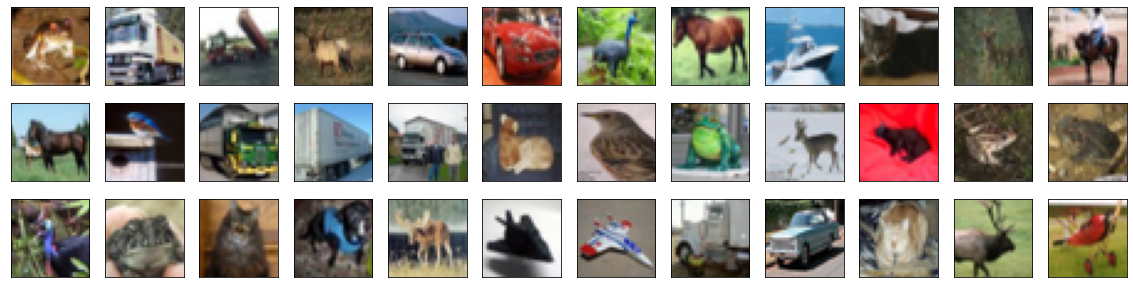

In [4]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  sub = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  plt.imshow(np.squeeze(train_data[i]))

In [5]:
train_data = train_data.astype('float32') / 255.0

In [6]:
test_data = test_data.astype('float32') / 255.0

In [7]:
from keras.utils import to_categorical

In [8]:
num_classes = len(np.unique(train_label))

In [9]:
num_classes

10

In [10]:
train_label = to_categorical(train_label,num_classes)
test_label = to_categorical(test_label,num_classes)

In [22]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [13]:
from keras.models import Sequential

In [14]:
model = Sequential()

In [16]:
model.add(Conv2D(16,(2,2),activation='relu',input_shape=(32,32,3)))

In [17]:
model.add(MaxPooling2D(2,2))

In [18]:
model.add(Conv2D(32,(2,2),activation='relu'))

In [19]:
model.add(MaxPooling2D((2,2)))

In [20]:
model.add(Conv2D(64,(2,2),activation='relu'))

In [21]:
model.add(MaxPooling2D(2,2))

In [23]:
model.add(Dropout(0.3))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(500,activation='relu'))

In [26]:
model.add(Dropout(0.4))

In [27]:
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0

In [32]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(train_data,train_label,epochs=10,validation_split=0.2,batch_size=64)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.9417 - accuracy: 0.6787 - val_loss: 0.8892 - val_accuracy: 0.6988
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8825 - accuracy: 0.6914 - val_loss: 0.9537 - val_accuracy: 0.6819
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8918 - accuracy: 0.6958 - val_loss: 0.9733 - val_accuracy: 0.6839
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8637 - accuracy: 0.7011 - val_loss: 0.9247 - val_accuracy: 0.6921
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8569 - accuracy: 0.7039 - val_loss: 0.8858 - val_accuracy: 0.7056
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8444 - accuracy: 0.7115 - val_loss: 0.9160 - val_accuracy: 0.6940
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8493 - accuracy: 0.7101 - val_loss: 0.8812 - val_accuracy: 0.7027
Epoch 

In [34]:
prediction = model.predict(test_data)

In [35]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

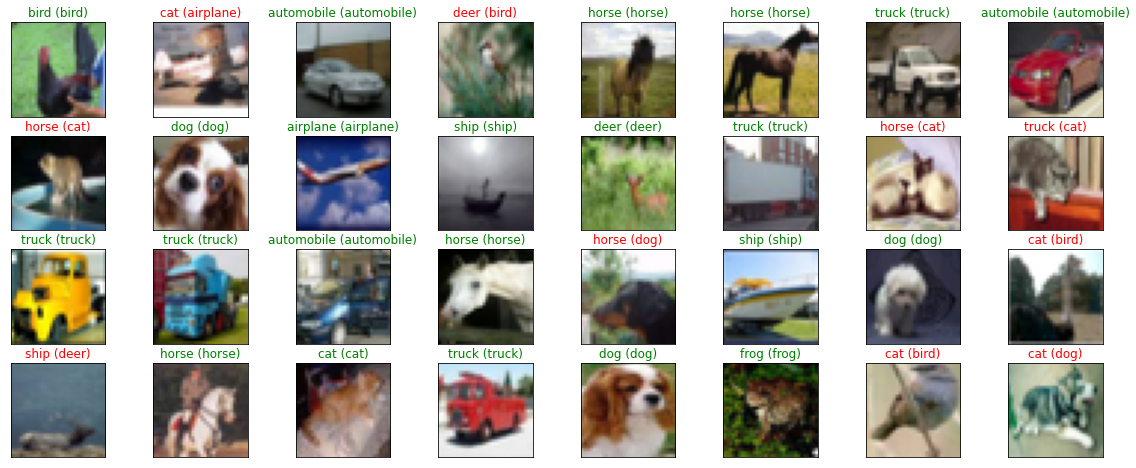

In [38]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_data.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_data[idx]))
    pred_idx = np.argmax(prediction[idx])
    true_idx = np.argmax(test_label[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))